## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importación de datos



In [2]:

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

#0. Exploracion de datos

In [3]:
tienda1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


## df tienen mismas columnas

In [4]:
names = ['tienda1', 'tienda2', 'tienda3', 'tienda4']
all_data = {name:df for name,df in zip(names,[tienda1, tienda2, tienda3, tienda4])}

In [5]:

def is_same_columns(list_df):
    """
    Check if all DataFrames in a list have identical columns and dtypes.
    """
    if not list_df:
        return True  # Empty list — no conflict

    # Reference from first DataFrame
    ref = list_df[0]
    ref_cols = list(ref.columns)
    ref_dtypes = ref.dtypes.to_dict()

    for i, df in enumerate(list_df[1:], start=2):
        if not df.columns.equals(ref.columns):
            print(f"❌ Columns differ in DataFrame {i}")
            return False
        if not df.dtypes.equals(ref.dtypes):
            print(f"❌ Dtypes differ in DataFrame {i}")
            return False

    return True

is_same_columns(list(all_data.values()))

True

## Ajuste formato tiempo

In [6]:
def adjust_date_format(df, column_name='Fecha de Compra'):
  df[column_name] = pd.to_datetime(df[column_name], errors='coerce', dayfirst=True)

#all_data = [tienda1, tienda2, tienda3, tienda4]
for df in all_data.values():
  adjust_date_format(df)


In [7]:
all_data['tienda2'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Producto                2359 non-null   object        
 1   Categoría del Producto  2359 non-null   object        
 2   Precio                  2359 non-null   float64       
 3   Costo de envío          2359 non-null   float64       
 4   Fecha de Compra         2359 non-null   datetime64[ns]
 5   Vendedor                2359 non-null   object        
 6   Lugar de Compra         2359 non-null   object        
 7   Calificación            2359 non-null   int64         
 8   Método de pago          2359 non-null   object        
 9   Cantidad de cuotas      2359 non-null   int64         
 10  lat                     2359 non-null   float64       
 11  lon                     2359 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), obje

In [8]:
all_data['tienda1'].head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,2021-01-16,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,2022-05-18,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,2021-03-15,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,2022-05-03,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,2020-11-07,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


## df tiene mismas Categoría del Producto

In [9]:
categorias = set(tienda1['Categoría del Producto'].unique())
print(categorias)

for name, df in  all_data.items():
  print(name,set(df['Categoría del Producto'].unique()) == categorias)

#categorias = set(tienda1['Categoría del Producto'].unique())

{'Artículos para el hogar', 'Deportes y diversión', 'Libros', 'Electrodomésticos', 'Juguetes', 'Electrónicos', 'Muebles', 'Instrumentos musicales'}
tienda1 True
tienda2 True
tienda3 True
tienda4 True


## revision global

In [10]:
#se puede revisar tienda por tienda
df = all_data['tienda4']

global_info ={}
for col in df.columns:
  if df[col].dtype == 'object':
    global_info[col] = df[col].unique()

for k,v in global_info.items():
  print(k,v)
  print()



Producto ['Lavavajillas' 'Cama box' 'Balón de baloncesto' 'Modelado predictivo'
 'Auriculares' 'Refrigerador' 'Guitarra eléctrica'
 'Auriculares con micrófono' 'Iphone 15' 'Mesa de noche' 'Muñeca bebé'
 'Dashboards con Power BI' 'Silla de oficina' 'Kit de bancas' 'Impresora'
 'Set de vasos' 'Mesa de comedor' 'Carrito de control remoto'
 'Cuerda para saltar' 'Estufa' 'Cama king' 'Balón de voleibol'
 'Secadora de ropa' 'Dinosaurio Rex' 'TV LED UHD 4K' 'Vaso térmico'
 'Smart TV' 'Mesa de centro' 'Tablet ABXY' 'Olla de presión' 'Batería'
 'Pandereta' 'Iniciando en programación' 'Juego de mesa' 'Celular ABXY'
 'Cubertería' 'Armario' 'Bloques de construcción' 'Bicicleta'
 'Asistente virtual' 'Set de ollas' 'Guitarra acústica'
 'Ajedrez de madera' 'Microondas' 'Smartwatch' 'Mochila'
 'Lavadora de ropa' 'Ciencia de datos con Python' 'Cubo mágico 8x8'
 'Sillón' 'Sofá reclinable']

Categoría del Producto ['Electrodomésticos' 'Muebles' 'Deportes y diversión' 'Libros'
 'Electrónicos' 'Instrumentos

## Productos por categoria

In [11]:
df = all_data['tienda2']
productos_por_categoria = {}
total_products = 0
for cat in df['Categoría del Producto'].unique():
  productos_por_categoria[cat] = df[df['Categoría del Producto']==cat]['Producto'].unique()
  cnt = len(productos_por_categoria[cat])
  total_products += cnt
  print(cat,productos_por_categoria[cat],cnt)
  print()
print(f"Hay {total_products } productos en Total ")

Muebles ['Silla de oficina' 'Cama king' 'Sillón' 'Armario' 'Mesa de centro'
 'Mesa de comedor' 'Kit de bancas' 'Cama box' 'Sofá reclinable'
 'Mesa de noche'] 10

Instrumentos musicales ['Pandereta' 'Guitarra acústica' 'Guitarra eléctrica' 'Batería'] 4

Deportes y diversión ['Mochila' 'Bicicleta' 'Cuerda para saltar' 'Vaso térmico'
 'Balón de baloncesto' 'Balón de voleibol'] 6

Electrónicos ['Tablet ABXY' 'TV LED UHD 4K' 'Auriculares con micrófono' 'Smart TV'
 'Celular ABXY' 'Asistente virtual' 'Auriculares' 'Smartwatch' 'Impresora'
 'Iphone 15'] 10

Artículos para el hogar ['Olla de presión' 'Set de vasos' 'Cubertería' 'Set de ollas'] 4

Juguetes ['Cubo mágico 8x8' 'Juego de mesa' 'Ajedrez de madera' 'Muñeca bebé'
 'Bloques de construcción' 'Dinosaurio Rex' 'Carrito de control remoto'] 7

Electrodomésticos ['Secadora de ropa' 'Lavavajillas' 'Estufa' 'Refrigerador'
 'Lavadora de ropa' 'Microondas'] 6

Libros ['Modelado predictivo' 'Dashboards con Power BI'
 'Ciencia de datos con Python'

In [12]:

def summarize_dataframes(dataframes, names=None,print_rev = False):
    """
    Print a concise summary for each DataFrame:
    - Shape (rows, columns)
    - Columns with missing values and their counts
    - Descriptive statistics (rounded to 2 decimals)
    """
    if names is None:
        names = [f"DataFrame {i+1}" for i in range(len(dataframes))]

    ans = {}
    for name, df in zip(names, dataframes):
        print(f"\n📊 Summary for {name}")
        print("=" * (12 + len(name)))

        # Shape
        print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

        # Missing values
        na_counts = df.isna().sum()
        na_counts = na_counts[na_counts > 0]
        if not na_counts.empty:
            print("\nMissing values:")
            print(na_counts.sort_values(ascending=False))
        else:
            print("\nNo missing values ✅")

        # Descriptive statistics
        if print_rev:
          print("\nDescriptive statistics:")
          #print(df.describe(include='all').round(2))
          print(df.describe().round(2))
        print("-" * 60)

        ans[name] = df.describe().round(2)

    return ans
analisis = summarize_dataframes(list(all_data.values()), list(all_data.keys()),False)



📊 Summary for tienda1
Shape: 2359 rows × 12 columns

No missing values ✅
------------------------------------------------------------

📊 Summary for tienda2
Shape: 2359 rows × 12 columns

No missing values ✅
------------------------------------------------------------

📊 Summary for tienda3
Shape: 2359 rows × 12 columns

No missing values ✅
------------------------------------------------------------

📊 Summary for tienda4
Shape: 2358 rows × 12 columns

No missing values ✅
------------------------------------------------------------


In [13]:
analisis['tienda3']

,Precio,Costo de envío,Fecha de Compra,Calificación,Cantidad de cuotas,lat,lon
count,2359.00,2359.00,2359,2359.00,2359.00,2359.00,2359.00
mean,465459.77,24805.68,2021-08-22 16:01:25.459940608,4.05,2.97,5.44,-74.73
min,7600.00,0.00,2020-01-01 00:00:00,1.00,1.00,-4.22,-77.28
25%,57400.00,3100.00,2020-10-27 12:00:00,4.00,1.00,4.61,-75.56
50%,226300.00,11900.00,2021-09-06 00:00:00,5.00,2.00,4.61,-74.20
75%,666050.00,34950.00,2022-06-15 12:00:00,5.00,4.00,6.25,-74.08
max,2968200.00,158400.00,2023-03-31 00:00:00,5.00,24.00,11.54,-67.92
std,580643.39,30945.89,NaN,1.39,2.81,2.41,1.22


In [14]:
#just to check if there is a min less than cero
for name, df_analisis in analisis.items():
  print(name, df_analisis.loc['min','Precio'],df_analisis.loc['min','Costo de envío'])
  print()


tienda1 7600.0 0.0

tienda2 7600.0 0.0

tienda3 7600.0 0.0

tienda4 7600.0 0.0



## Revision de Outliers

In [15]:
import numpy as np

def review_outliers_iqr(df,colums_review = ['Precio','Costo de envío'],columns_filter=['Categoría del Producto','Producto'], threshold=1.5):
  """
  Detect potential outliers in numeric colums_review using the IQR method.
  but using columns filter to group

  note:It doesn’t necessarily mean that the distribution is perfectly clean —
  only that the IQR rule (with your chosen threshold) doesn’t flag any outliers.
  """
  ans = {}

  for col in colums_review:
    df_reveiw = df.groupby(columns_filter)[col].describe()
    df_reveiw.columns = [''.join(col).strip() for col in df_reveiw.columns.values] # Aplanar las columnas multiindex creadas en groupby
    df_reveiw = df_reveiw.reset_index()


    df_reveiw['lower_bound'] = df_reveiw['25%'] - (df_reveiw['75%']-df_reveiw['25%'])*threshold
    df_reveiw['upper_bound'] = df_reveiw['75%'] + (df_reveiw['75%']-df_reveiw['25%'])*threshold
    df_reveiw['outliers'] = ~((df_reveiw['upper_bound'] > df_reveiw['max']) | (df_reveiw['min'] > df_reveiw['lower_bound']))

    ans[col] = any(df_reveiw['outliers'])

  for col,outlier in ans.items():
      print(f"the column {col} {'possibly have' if outlier else 'doesn’t flag any'} outliers")

  return ans

df = all_data['tienda2']
review_outliers_iqr(df,colums_review = ['Precio','Costo de envío'],columns_filter=['Categoría del Producto','Producto'], threshold=1.5)



the column Precio doesn’t flag any outliers
the column Costo de envío possibly have outliers


{'Precio': False, 'Costo de envío': True}

In [16]:

for name, df in all_data.items():
  print(name)
  review_outliers_iqr(df)


tienda1
the column Precio doesn’t flag any outliers
the column Costo de envío doesn’t flag any outliers
tienda2
the column Precio doesn’t flag any outliers
the column Costo de envío possibly have outliers
tienda3
the column Precio doesn’t flag any outliers
the column Costo de envío possibly have outliers
tienda4
the column Precio doesn’t flag any outliers
the column Costo de envío possibly have outliers


In [17]:
def review_outliers_2(df,column,columns_filter,threshold=1.5):
    """
    Detects outliers in `column` grouped by `columns_filter`
    using the IQR method.
    Returns a DataFrame containing only outlier rows.
    """

    # Describe stats per group
    df_review = df.groupby(columns_filter)[column].describe().reset_index()

    # Compute IQR and bounds
    iqr = df_review['75%'] - df_review['25%']
    df_review['lower_bound'] = df_review['25%'] - iqr * threshold
    df_review['upper_bound'] = df_review['75%'] + iqr * threshold

    # Merge back to original dataframe
    df_merged = df.merge(df_review[columns_filter + ['lower_bound', 'upper_bound']], on=columns_filter, how='left')

    # Filter rows that are outside bounds (outliers)
    df_outliers = df_merged[
        (df_merged[column] < df_merged['lower_bound']) |
        (df_merged[column] > df_merged['upper_bound'])
    ].copy()

    return df_outliers

#play with threshold=3
df = all_data['tienda4']

df_review = review_outliers_2(df, column = 'Costo de envío',columns_filter=['Categoría del Producto','Producto'], threshold=3)

df_review[['Categoría del Producto','Producto', 'Lugar de Compra','Precio', 'Costo de envío','upper_bound']].sort_values(by='Categoría del Producto')



,Categoría del Producto,Producto,Lugar de Compra,Precio,Costo de envío,upper_bound
103,Artículos para el hogar,Set de vasos,Bogotá,39800.0,8900.0,6025.0
1146,Artículos para el hogar,Set de vasos,Cali,27400.0,7300.0,6025.0
1031,Artículos para el hogar,Set de vasos,Cali,33100.0,8600.0,6025.0
657,Artículos para el hogar,Set de vasos,Leticia,39500.0,8900.0,6025.0
310,Artículos para el hogar,Set de vasos,Bogotá,27700.0,10200.0,6025.0
372,Artículos para el hogar,Set de vasos,Barranquilla,43500.0,8400.0,6025.0
2189,Deportes y diversión,Cuerda para saltar,Medellín,18400.0,6600.0,6000.0
117,Deportes y diversión,Cuerda para saltar,Bogotá,18000.0,7800.0,6000.0
540,Deportes y diversión,Cuerda para saltar,Soacha,18300.0,7000.0,6000.0
769,Instrumentos musicales,Pandereta,Bogotá,91200.0,11700.0,11600.0


En revision los datos parecen estar limpios y son consistentes, incluso los que se podrian considerar outliers no parecen alejarse mucho de los valores maximos por lo que se podrian asumir que los valores son utiles.

#1. Análisis de facturación



La  tienda1 tiene un total de ventas de 1089502500.0
La  tienda2 tiene un total de ventas de 1056858400.0
La  tienda3 tiene un total de ventas de 1039503000.0
La  tienda4 tiene un total de ventas de 983058300.0


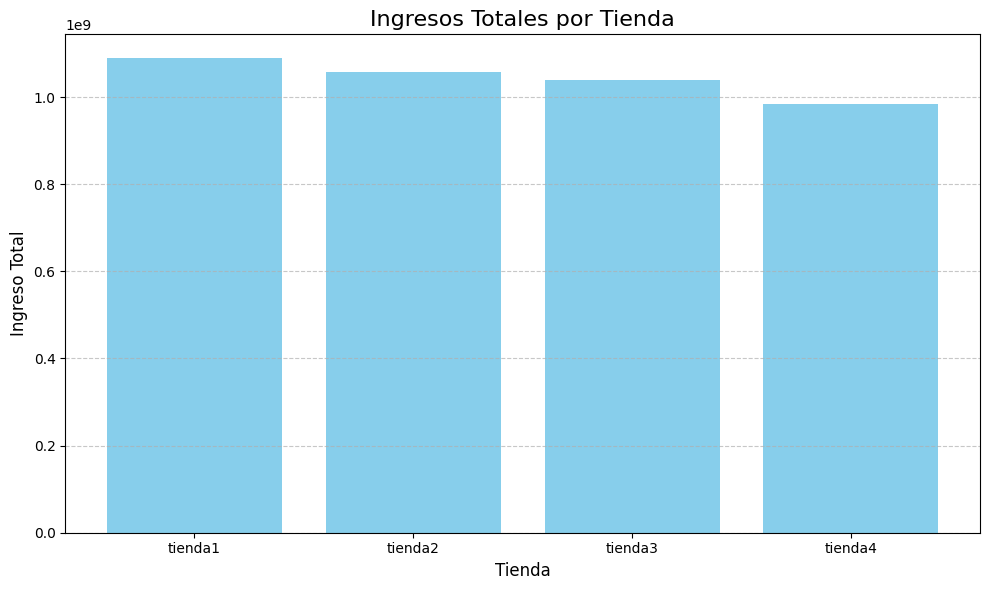

In [18]:
def graficar_ingresos_por_tienda(all_df):
    """
    Grafica los ingresos por tienda

    Parámetros
    ----------
    """

    # Crear columna de ingreso total si no existe
    ingresos_dict = {}

    for tienda, df in all_df.items():
      df = df.copy()
      df["Ingreso Total"] = df["Precio"] - df["Costo de envío"]
      ingresos_dict[tienda] = df["Ingreso Total"].sum()

    for tienda, ingreso in ingresos_dict.items():
      print(f"La  {tienda} tiene un total de ventas de {ingreso}")

    # Extraer nombres de tiendas e ingresos
    tiendas = list(ingresos_dict.keys())
    ingresos = list(ingresos_dict.values())

    # Crear la figura y los ejes para el gráfico
    plt.figure(figsize=(10, 6)) # Define el tamaño del gráfico

    # Crear el gráfico de barras
    plt.bar(tiendas, ingresos, color='skyblue')

    # Agregar títulos y etiquetas
    plt.title('Ingresos Totales por Tienda', fontsize=16)
    plt.xlabel('Tienda', fontsize=12)
    plt.ylabel('Ingreso Total', fontsize=12)

    # Mostrar la cuadrícula para facilitar la lectura
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Ajustar el diseño para que las etiquetas no se corten
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

graficar_ingresos_por_tienda(all_data)


# 2. Ventas por categoría

<Figure size 1200x600 with 0 Axes>

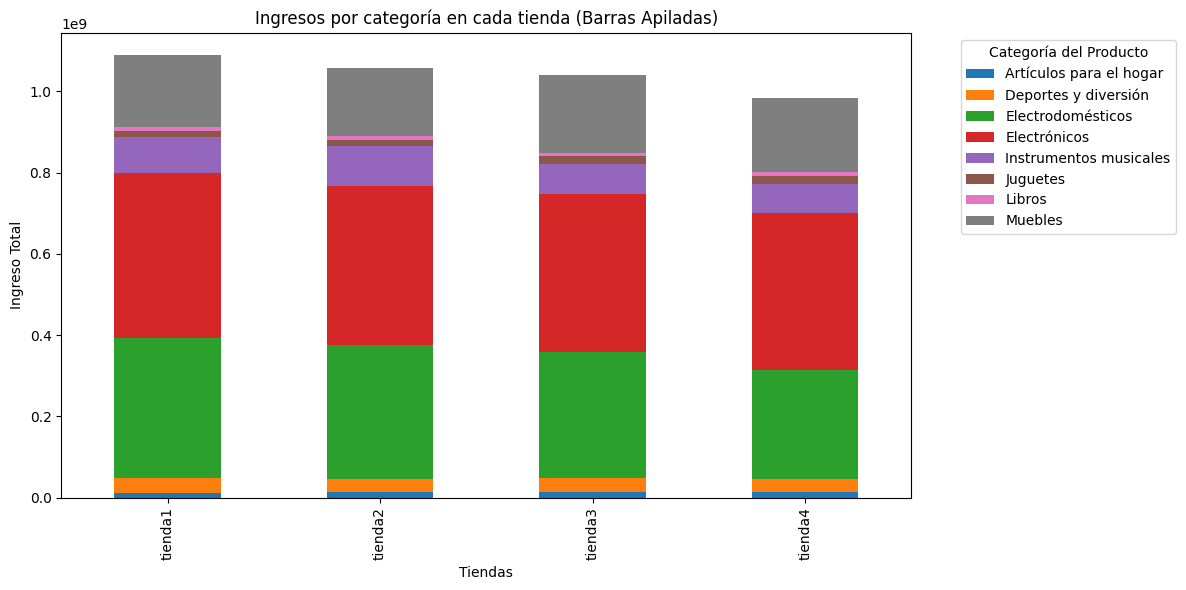

,Categoría del Producto,tienda1,tienda2,tienda3,tienda4
0,Artículos para el hogar,12054600.0,13946100.0,14247600.0,14220400.0
1,Deportes y diversión,37168900.0,32867200.0,33670000.0,31580000.0
2,Electrodomésticos,344361200.0,330012200.0,311743700.0,268237700.0
3,Electrónicos,406529800.0,389016900.0,388919900.0,387647800.0
4,Instrumentos musicales,86415100.0,99432600.0,73272100.0,71148500.0
5,Juguetes,17016200.0,15057800.0,18359400.0,19149700.0
6,Libros,8317900.0,9535400.0,9002300.0,8780600.0
7,Muebles,177638800.0,166990200.0,190288000.0,182293600.0


In [19]:
def ingresos_por_tienda_categoria(all_data):
  """
    Devuelve df con ingresos por tienda agrupado por 'Categoría del Producto'

    Parámetros
    ----------
    all_data : dict
        Diccionario {nombre_tienda: dataframe}
  """

  df_ingresos = None

  for tienda, df in all_data.items():
    df = df.copy()
    df["Ingreso Total"] = df["Precio"] - df["Costo de envío"]

    df_ingreso_tienda = (
        df.groupby("Categoría del Producto")["Ingreso Total"]
        .sum()
        .to_frame(name=tienda)
        .reset_index()
    )

    if df_ingresos is None:
      df_ingresos = df_ingreso_tienda
    else:
      df_ingresos = df_ingresos.merge(
      df_ingreso_tienda,
      on="Categoría del Producto",
      # por si alguna tienda no tiene cierta categoría,
      #que no debe ocurrir porque ya se demostro que son iguales
      how="outer" )

  return df_ingresos


def graficar_ingresos_por_tienda_y_categoria(df_ingresos):
  """
    Grafica 1 barra por tienda (stacked bar chart), dividida por categoría.

    Parámetros
    ----------
    df_ingresos:
        df_columns = {"Categoría del Producto": 'con los nombres de las categorias',
        " 'tienda1', 'tienda2', 'tienda3', 'tienda4'": 'con los ingresos por tienda'}
  """


  # Asegurar que la columna de categoría es índice
  df_plot = df_ingresos.set_index("Categoría del Producto")

  # Transponer para que:
  # - filas: tiendas
  # - columnas: categorías
  df_plot = df_plot.T

  # Crear la figura
  plt.figure(figsize=(12, 6))

  # Hacer el grafico apilado
  df_plot.plot(kind="bar", stacked=True, figsize=(12, 6))

  plt.title("Ingresos por categoría en cada tienda (Barras Apiladas)")
  plt.xlabel("Tiendas")
  plt.ylabel("Ingreso Total")

  plt.legend(title="Categoría del Producto", bbox_to_anchor=(1.05, 1), loc="upper left")
  plt.tight_layout()

  plt.show()


df_ingresos = ingresos_por_tienda_categoria(all_data)
graficar_ingresos_por_tienda_y_categoria(df_ingresos)
df_ingresos

# 3. Calificación promedio de la tienda


In [20]:
cal = {}
for name, df in all_data.items():
  cal[name] = df['Calificación'].mean()
df_calificacion = pd.DataFrame(cal.items(), columns=['Tienda', 'Calificación']).sort_values(by='Calificación',ascending=False)
print("calificacion promedio por tienda")
df_calificacion

calificacion promedio por tienda


,Tienda,Calificación
2,tienda3,4.048326
1,tienda2,4.037304
3,tienda4,3.995759
0,tienda1,3.976685


In [21]:
def calificacion_por_tienda_categoria(all_data):

  df_calificacion = None

  for tienda, df in all_data.items():
    df_calificacion_tienda =  df.groupby("Categoría del Producto")["Calificación"].mean()
    df_calificacion_tienda = df_calificacion_tienda.to_frame(name=tienda)
    df_calificacion_tienda = df_calificacion_tienda.reset_index()
    if df_calificacion is None:
      df_calificacion = df_calificacion_tienda
    else:
      df_calificacion = df_calificacion.merge(df_calificacion_tienda, on="Categoría del Producto", how="outer")

  df_calificacion["promedio"] = df_calificacion.drop(columns=["Categoría del Producto"]).mean(axis=1)
  df_calificacion = df_calificacion.sort_values(by="promedio", ascending=False)

  return df_calificacion

df_calificacion = calificacion_por_tienda_categoria(all_data)
df_calificacion

,Categoría del Producto,tienda1,tienda2,tienda3,tienda4,promedio
5,Juguetes,4.077160,4.025559,4.196825,3.988166,4.071928
7,Muebles,3.946237,4.092760,4.098196,3.997917,4.033777
2,Electrodomésticos,4.032051,4.072131,4.010791,3.929134,4.011027
6,Libros,3.976879,3.949239,4.048649,4.042781,4.004387
4,Instrumentos musicales,4.049451,4.035714,4.005650,3.911765,4.000645
3,Electrónicos,4.004464,3.971564,3.986696,4.006652,3.992344
1,Deportes y diversión,3.897887,4.065455,3.938628,4.054152,3.989030
0,Artículos para el hogar,3.748538,4.071823,4.073446,4.009950,3.975939


In [22]:
def califiacion_por_vendedor(all_data):

  df_calificacion = None

  for tienda, df in all_data.items():
    df_calificacion_tienda =  df.groupby("Vendedor")["Calificación"].mean()
    df_calificacion_tienda = df_calificacion_tienda.reset_index()
    df_calificacion_tienda.insert(0, "tienda", tienda)
    if df_calificacion is None:
      df_calificacion = df_calificacion_tienda
    else:
      df_calificacion = pd.concat([df_calificacion, df_calificacion_tienda])

  return df_calificacion


df_cal_vendedor = califiacion_por_vendedor(all_data)

In [23]:
#mejores 5  vendedores globalmente, para todas las tiendas
df_cal_vendedor.sort_values(by="Calificación",ascending=False).head(5)

,tienda,Vendedor,Calificación
13,tienda1,Ángel Rodriguez,4.248521
0,tienda3,Beatriz Morales,4.208861
9,tienda2,Mariana Herrera,4.191083
10,tienda3,Pedro Gomez,4.186335
13,tienda3,Ángel Rodriguez,4.181287


In [24]:
#top 3 vendedores por tienda
n =3
df_mejores_vendedores = (df_cal_vendedor.sort_values(["tienda", "Calificación"], ascending=[True, False])
.groupby("tienda")
.head(n)
.reset_index(drop=True))
df_mejores_vendedores

,tienda,Vendedor,Calificación
0,tienda1,Ángel Rodriguez,4.248521
1,tienda1,Rafael Acosta,4.070175
2,tienda1,Santiago Silva,4.055556
3,tienda2,Mariana Herrera,4.191083
4,tienda2,Pedro Gomez,4.169591
5,tienda2,Camila Rivera,4.142857
6,tienda3,Beatriz Morales,4.208861
7,tienda3,Pedro Gomez,4.186335
8,tienda3,Ángel Rodriguez,4.181287
9,tienda4,Santiago Silva,4.160920


In [25]:
# df_vendedores_en_promedio = (
#     df_cal_vendedor
#     .groupby("tienda", group_keys=False)
#     .apply(lambda g:
#         g[g["Calificación"].between(g["Calificación"].mean() - 0.05,
#                                     g["Calificación"].mean() + 0.05)],include_groups=False
#     )
# )

In [26]:
#Anailisis por vendedor y categoria??
# df_analisis = all_data['tienda2'].copy()
# df_analisis = df_analisis.groupby(['Categoría del Producto','Vendedor'])['Calificación'].mean().sort_values(ascending=False)
# df_analisis = df_analisis.to_frame()
# df_analisis.columns = df_analisis.columns.values
# df_analisis= df_analisis.reset_index()
# df_analisis[df_analisis['Vendedor']=='Mariana Herrera']

In [27]:
all_data['tienda1'].columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

# 4. Productos más y menos vendidos

In [28]:
def califiacion_por_producto(all_data):

  df_calificacion = None

  df_calificacion_producto = pd.DataFrame(columns=['Producto','Calificación'])
  for df in all_data.values():
    df_calificacion_producto = pd.concat([df_calificacion_producto,df[['Producto','Calificación']]])

  df_calificacion_producto =  df.groupby('Producto')['Calificación'].mean()
  df_calificacion_producto = df_calificacion_producto.reset_index()
  df_calificacion_producto.sort_values(by='Calificación',ascending=False,inplace=True)
  return df_calificacion_producto


df_cal_producto = califiacion_por_producto(all_data)
df_cal_producto.head()


,Producto,Calificación
7,Batería,4.333333
3,Auriculares,4.318182
6,Balón de voleibol,4.291667
17,Cuerda para saltar,4.279070
24,Iniciando en programación,4.255814


In [30]:
all_data['tienda1'].head(2)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,2021-01-16,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,2022-05-18,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359


# 5. Envío promedio por tienda

# Notas